In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

In [2]:
elec = pd.read_csv('../datasets/2008_all_states.csv')
elec_swing = pd.read_csv('../datasets/2008_swing_states.csv')

In [3]:
elec.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [4]:
elec_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [5]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 8 columns):
state          3153 non-null object
county         3153 non-null object
total_votes    3153 non-null int64
dem_votes      3153 non-null int64
rep_votes      3153 non-null int64
other_votes    3153 non-null int64
dem_share      3153 non-null float64
east_west      3153 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 197.2+ KB


In [6]:
elec_swing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
state          222 non-null object
county         222 non-null object
total_votes    222 non-null int64
dem_votes      222 non-null int64
rep_votes      222 non-null int64
dem_share      222 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.5+ KB


### Graphical EDA

## Histograms

Text(0, 0.5, 'Number of counties')

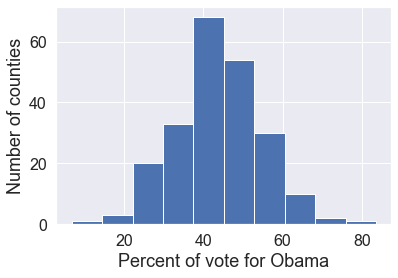

In [7]:
plt.hist(elec_swing['dem_share'])
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

Text(0, 0.5, 'Number of counties')

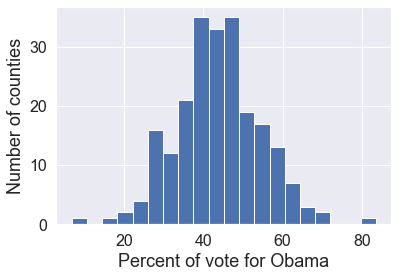

In [8]:
plt.hist(elec_swing['dem_share'], bins=20)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

### The square root rule
set the number of bins to be the square root of the n umber of samples

Text(0, 0.5, 'Number of counties')

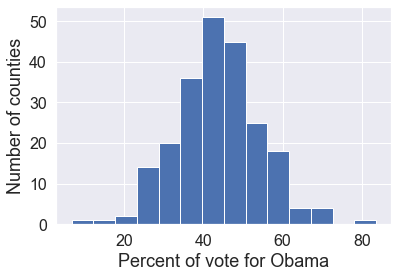

In [9]:
plt.hist(elec_swing['dem_share'], bins=int(np.sqrt(len(elec_swing['dem_share']))))
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

## Bee swarm plots

Text(0, 0.5, 'Percent of vote for Obama')

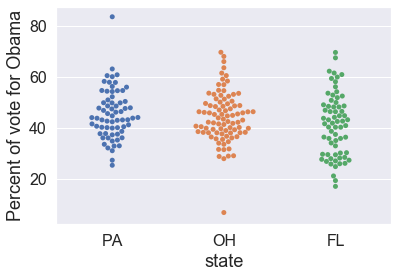

In [10]:
sns.swarmplot(x='state', y='dem_share', data=elec_swing)
plt.xlabel('state')
plt.ylabel('Percent of vote for Obama')

Text(0, 0.5, 'Percent of vote for Obama')

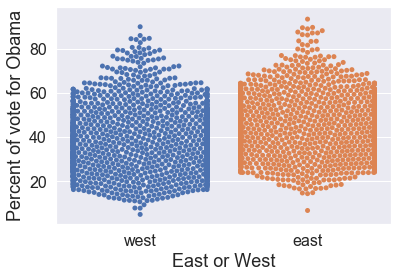

In [11]:
sns.swarmplot(x='east_west', y='dem_share', data=elec)
plt.xlabel('East or West')
plt.ylabel('Percent of vote for Obama')

For the data for all states swarm plot becomes not as informative.

## Empirical cumulative distribution function (ECDF)

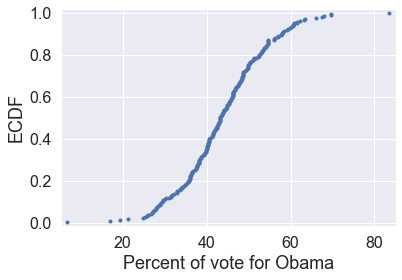

In [12]:
x = np.sort(elec_swing['dem_share'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', ls='none')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)

In [13]:
def ecdf(data):
    """Generate ecdf for a givin array"""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

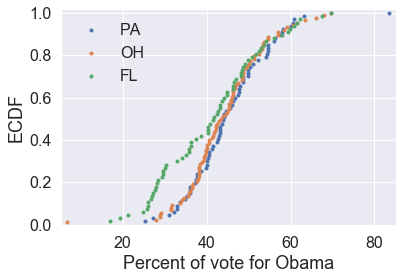

In [14]:
plt.plot(*ecdf(elec_swing.loc[elec_swing['state'] == 'PA', 'dem_share']), marker='.', ls='none')
plt.plot(*ecdf(elec_swing.loc[elec_swing['state'] == 'OH', 'dem_share']), marker='.', ls='none')
plt.plot(*ecdf(elec_swing.loc[elec_swing['state'] == 'FL', 'dem_share']), marker='.', ls='none')
plt.legend(('PA', 'OH', 'FL'), frameon=False)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)

# Quantitative EDA

## Summary statistics: mean and median

In [15]:
print(f"Mean of percent of vote for Obama = {elec_swing['dem_share'].mean()} %")
print(f"Median of percent of vote for Obama = {elec_swing['dem_share'].median()} %")

Mean of percent of vote for Obama = 43.76441441441442 %
Median of percent of vote for Obama = 43.185 %


## Percentiles

In [16]:
np.percentile(elec_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

## Box plots

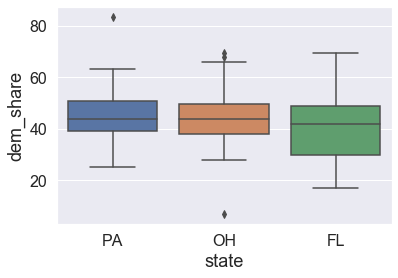

In [17]:
sns.boxplot(x='state', y='dem_share', data=elec_swing)

## Variance

In [18]:
np.var(elec_swing['dem_share'])

114.24649492735979

In [19]:
np.std(elec_swing['dem_share'])

10.688615201575917

In [20]:
np.sqrt(np.var(elec_swing['dem_share']))

10.688615201575917

## Scatter plot

Text(0, 0.5, 'Percent of vote for Obama')

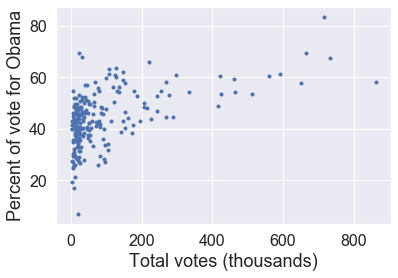

In [21]:
plt.plot(elec_swing['total_votes'] / 1000, elec_swing['dem_share'], marker='.', ls='none')
plt.xlabel('Total votes (thousands)')
plt.ylabel('Percent of vote for Obama')

Text(0, 0.5, 'Percent of vote for Obama')

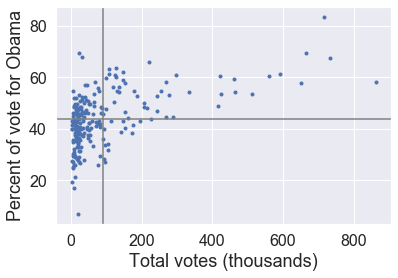

In [22]:
plt.plot(elec_swing['total_votes'] / 1000, elec_swing['dem_share'], marker='.', ls='none')
xlim = plt.xlim()
ylim = plt.ylim()
total_votes_mean = elec_swing['total_votes'].mean() / 1000
dem_share_mean = elec_swing['dem_share'].mean()
plt.plot([total_votes_mean, total_votes_mean], ylim, c='gray')
plt.plot(xlim, [dem_share_mean, dem_share_mean], c='gray')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Total votes (thousands)')
plt.ylabel('Percent of vote for Obama')

## Covariance

In [23]:
np.corrcoef(elec_swing['total_votes'], elec_swing['dem_share'])

array([[1.        , 0.53619736],
       [0.53619736, 1.        ]])

In [24]:
elec_swing[['total_votes', 'dem_share']].corr()

,total_votes,dem_share
total_votes,1.000000,0.536197
dem_share,0.536197,1.000000
